
# 🧮 Exploring Microstates and Macrostates in Thermal Physics

Welcome!  
This Jupyter notebook will help you explore **how macroscopic equilibrium emerges from microscopic states**.  
You will simulate simple physical systems to visualize concepts like **microstates**, **macrostates**, and **multiplicity**.

---

## 🧭 How to use this notebook

- The notebook is composed of **text cells** (like this one) and **code cells** (with Python code).  
- To execute a code cell:
  - Click inside the cell.
  - Press **Shift + Enter**, or click the ▶ **Run** button in the toolbar.
- You can **modify parameters** (e.g. number of coins or oscillators) and **re-run** cells to explore different cases.
- Lines starting with `#` in code are **comments** explaining what the code does.

Let's begin!


In [1]:

# 🔧 Import required Python libraries
import numpy as np               # For numerical operations and arrays
import matplotlib.pyplot as plt  # For plotting
from math import comb            # For combinatorial coefficients ("n choose k")



## 🪙 Activity 1 – Microstates and Macrostates: Coin Tosses

Each **microstate** is a specific sequence of heads and tails.  
A **macrostate** is defined by the number of heads $N_H$.  
The **multiplicity** (number of microstates corresponding to a macrostate) is:
\[
\Omega(N, N_H) = \binom{N}{N_H}
\]

We will visualize the probability of each macrostate for $N$ coin tosses.

You can edit the cell below by changing $N$, to see how the final distribution evolves.
Remember that the result is going to be a large number, as it involves factorials.
If you set N too large, the computer is not going to be able to handle these large numbers and evaluate the factorials


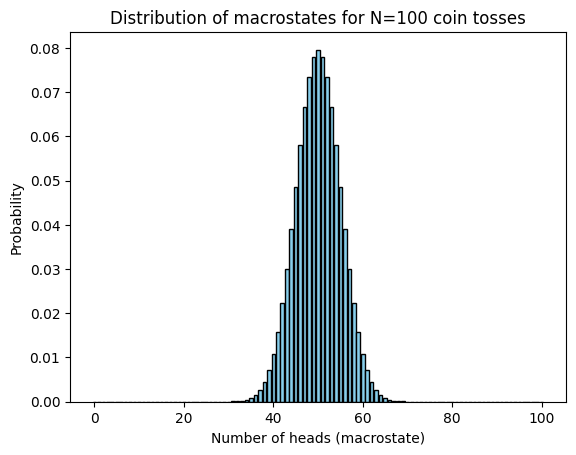

In [25]:

# Number of coins
N = 100

# np.arange(a, b) creates an array of integers from a up to (but not including) b
# each element of the array is a macrostate = total number of heads, for example
macrostates = np.arange(N + 1)

#for each possible macrosotate, we evaluate the multiplicity by computing the binomial coefficient
# comb(N, k) computes "N choose k" = number of ways to have k heads out of N coins
multiplicity = np.array([comb(N, N_H) for N_H in macrostates])

# Normalize to get probabilities
prob = multiplicity / np.sum(multiplicity)

# Plot probability distribution
plt.bar(macrostates, prob, color="skyblue", edgecolor="k")
plt.xlabel("Number of heads (macrostate)")
plt.ylabel("Probability")
plt.title(f"Distribution of macrostates for N={N} coin tosses")
plt.show()



## 💎 Activity 2 – Einstein Solid: Counting Microstates

An **Einstein solid** has $N$ oscillators sharing $q$ energy quanta.  
The multiplicity is:
$$
\Omega(N, q) = \binom{q + N - 1}{q}
$$

If you are not familiar with the derivation of this result, please review the relevant lecture. The idea is that we we can organize the quanta as a list of symbols, and add in between them N-1 more symbols acting as separation. We add N-1 separation because if we need to divide the list into N=2 parts, we need N-1 = 1 separation, and so on.

We will see how multiplicity grows with $q$.


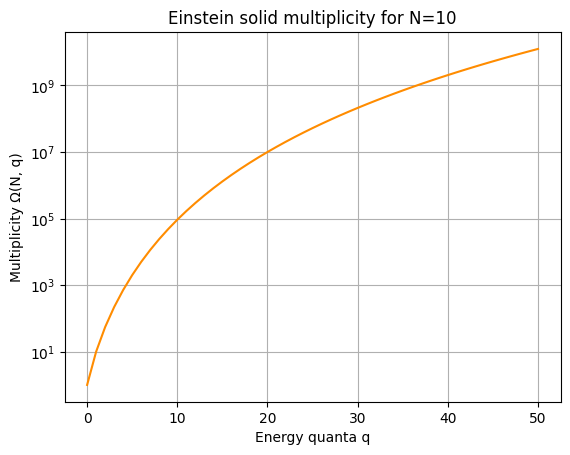

In [6]:

# Function to compute multiplicity of an Einstein solid
# N = number of oscillators,
# q = number of quanta
def multiplicity(N, q):
    # Number of ways to distribute q quanta among N oscillators - the binomail coeifficent 
    return comb(q + N - 1, q)

# Parameters
#number of oscillators
N = 10
#max number of quanta
q_max = 50
q_values = np.arange(0, q_max+1)  # we create a list of possible quanta values, 0,1,..,energy quanta values

# We evaluate the elements of an array Omega.
# The first element is Omega(N,0)
# The second is Omega(N,1)
# and so on
# so for each possible value of q (for q in q_values), we evluate Multiplicity(N,q)
omega = np.array([multiplicity(N, q) for q in q_values])

# Plot multiplicity as function of q
plt.semilogy(q_values, omega, color="darkorange")
plt.xlabel("Energy quanta q")
plt.ylabel("Multiplicity Ω(N, q)")
plt.title(f"Einstein solid multiplicity for N={N}")
plt.grid(True)
plt.show()



## ⚙️ Activity 3 – Two Einstein Solids in Contact

Two solids $A$ and $B$ share a total of $q_{\text{total}}$ quanta:
$$
q_A + q_B = q_{\text{total}}
$$
Solid $A$ has $N_A$ oscillators, while solid $B$ has $N_B$ oscillators.

We will study how the properties of the system as the two solids become larger, under the assumption that the average number of quanta per oscillator stays constant, $q_{total} = q_ave (N_A+N_B)$. So if we double the system, we also double the overall energy.

The total multiplicity for a given energy division is:
$$
\Omega_{\text{total}}(q_A) = \Omega_A(N_A, q_A) \cdot \Omega_B(N_B, q_{\text{total}} - q_A)
$$

We will compute and visualize the probability distribution of energy between the two solids.

After plotting it, we also compute the average value and the standard deviation

You can play with the values of $N_A$, $N_B$, and $q_{ave}$.


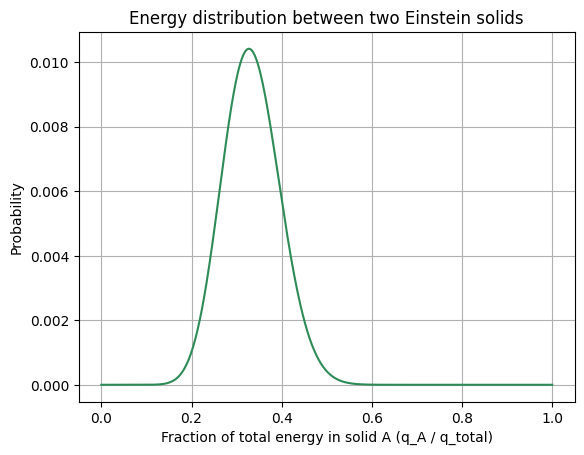

Mean q_A = 200.00
Standard deviation σ_qA = 37.98
Relative fluctuation σ_qA / q_total = 0.0633


In [12]:

# Parameters for the two solids
N_A = 20
N_B = 40
# average number of quanta per oscillator
q_ave = 10  
# total number of quanta
q_total = q_ave * (N_A + N_B)

# Multiplicity function
def Omega(N, q):
    return comb(q + N - 1, q)

# List of possible quanta of solid A. 
# The solid can have 0,1,2,..., q_total quanta
qA_vals = np.arange(0, q_total + 1)

# Compute total multiplicity for each q_A
Omega_total = np.array([Omega(N_A, qA) * Omega(N_B, q_total - qA) for qA in qA_vals])

# Normalize to get probabilities
P = Omega_total / np.sum(Omega_total)

# Plot distribution
plt.plot(qA_vals / q_total, P, color="seagreen")
plt.xlabel("Fraction of total energy in solid A (q_A / q_total)")
plt.ylabel("Probability")
plt.title("Energy distribution between two Einstein solids")
plt.grid(True)
plt.show()

# Compute mean and variance of q_A
mean_qA = np.sum(qA_vals * P)
var_qA = np.sum((qA_vals - mean_qA)**2 * P)
sigma_qA = np.sqrt(var_qA)

print(f"Mean q_A = {mean_qA:.2f}")
print(f"Standard deviation σ_qA = {sigma_qA:.2f}")
print(f"Relative fluctuation σ_qA / q_total = {sigma_qA / q_total:.4f}")


## 📈 Activity 4 – Scaling of Fluctuations with System Size

We now explore how fluctuations shrink as system size increases.  
We keep $q/N$ constant.

Here we study how the fluctuations in the energy of subsystem A depend on $N_A$, when two identical Einstein solids share a total number of quanta $q_{total} = q_{ave} * (N_A + N_B)$.

By fluctuations, we refer to the standard deviations of the probability distribution of the number of quanta assigned to solid $A$, which is $\sigma = \sqrt{\langle q_a^2 \rangle-\langle q_a \rangle^2}$, where $\langle x \rangle$ indicates the average value of $x$.

We study the $N_A$ dependence of the fluctuations, $\sigma$, and the relative fluctuations, $\sigma/N$.

We consider $N$ values up to $100$. Larger ones lead to numbers to big for the computer to handle


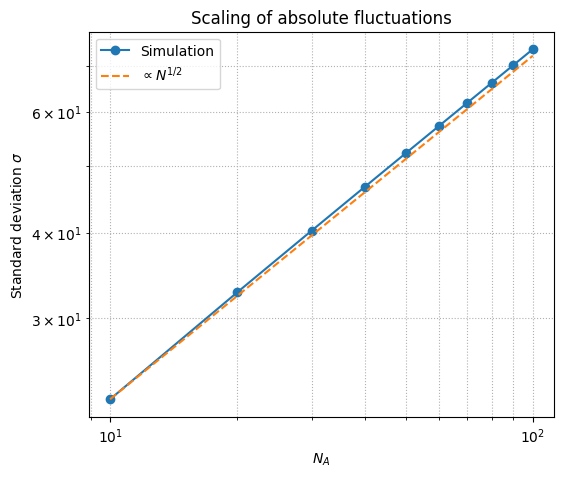

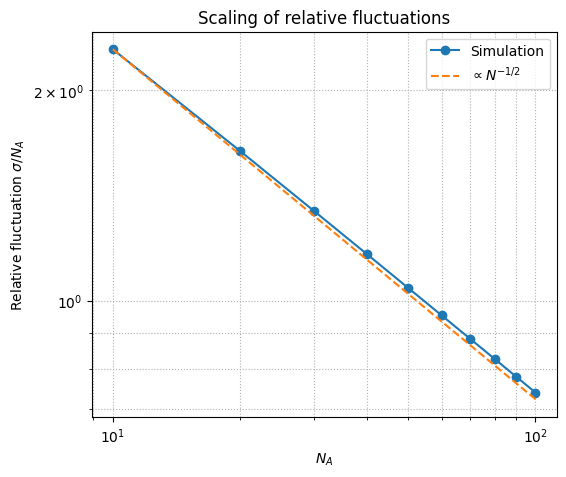

In [24]:
sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # different system sizes
q_ave = 10  # average number of quanta per oscillator

std_devs = []      # to store standard deviations of q_A
rel_std_devs = []  # to store relative fluctuations σ/N_A

for N_A in sizes:
    N_B = N_A
    q_total = q_ave * (N_A + N_B)

    # All possible distributions of energy quanta to solid A
    qA_vals = np.arange(0, q_total + 1) 

    # Compute multiplicities for all possible energy partitions
    P = np.array([Omega(N_A, qA) * Omega(N_B, q_total - qA) for qA in qA_vals], dtype=np.float64)
    P /= np.sum(P)  # normalize to obtain probabilities

    # Mean and standard deviation of q_A
    mean_qA = np.sum(qA_vals * P) # we are comupting [sum q*P(q) = <q>]
    mean_q2A = np.sum(qA_vals**2 * P) # we are comupting [sum q^2*P(q) = <q^2>]
    std_qA = np.sqrt(mean_q2A-mean_qA**2) # we compute the standard deviation

    std_devs.append(std_qA)
    rel_std_devs.append(std_qA / N_A)

# -------------------------------------------------------------------------
# Plot 1: Absolute fluctuations σ vs N_A (expected ∝ N_A^{1/2})
# -------------------------------------------------------------------------
plt.figure(figsize=(6,5))
plt.loglog(sizes, std_devs, 'o-', label='Simulation')

# Add reference line for N^{1/2} scaling
ref_line = np.array(sizes)**0.5
ref_line *= std_devs[0] / ref_line[0]  # scale to roughly match
plt.loglog(sizes, ref_line, '--', label=r'$\propto N^{1/2}$')

plt.xlabel(r"$N_A$")
plt.ylabel(r"Standard deviation $\sigma$")
plt.title("Scaling of absolute fluctuations")
plt.legend()
plt.grid(True, which='both', ls=':')
plt.show()

# -------------------------------------------------------------------------
# Plot 2: Relative fluctuations σ/N_A vs N_A (expected ∝ N_A^{-1/2})
# -------------------------------------------------------------------------
plt.figure(figsize=(6,5))
plt.loglog(sizes, rel_std_devs, 'o-', label='Simulation')

# Add reference line for N^{-1/2} scaling
ref_line = np.array(sizes)**(-0.5)
ref_line *= rel_std_devs[0] / ref_line[0]
plt.loglog(sizes, ref_line, '--', label=r'$\propto N^{-1/2}$')

plt.xlabel(r"$N_A$")
plt.ylabel(r"Relative fluctuation $\sigma / N_A$")
plt.title("Scaling of relative fluctuations")
plt.legend()
plt.grid(True, which='both', ls=':')
plt.show()




## 🧠 Key Takeaways

- **Microstates:** All possible microscopic configurations.  
- **Macrostates:** Coarse-grained descriptions (e.g., total number of heads, total energy).  
- **Multiplicity** $\Omega(N, q)$: Number of microstates compatible with a macrostate.  
- The **most probable macrostate** maximizes $\Omega$.  
- **Relative fluctuations** shrink as $1/\sqrt{N}$, leading to well-defined equilibrium for large systems.

---
Experiment with different parameters and re-run the notebook to deepen your intuition!
